# Swap Network

Functionality for moving data between registers (swapping).

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `CSwap`
Swap two registers controlled on a control bit.

Implements a multi-target controlled swap unitary $CSWAP_n = |0><0| I + |1><1| SWAP_n$.

This decomposes into a qubitwise SWAP on the two target registers, and takes $14n$ T-gates.

#### Parameters
 - `bitsize`: The bitsize of each of the two registers being swapped. 

#### Registers
 - `ctrl`: the control bit
 - `x`: the first register
 - `y`: the second register


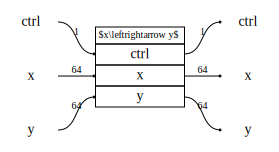

In [2]:
from qualtran.bloqs.basic_gates import CSwap

bloq = CSwap(bitsize=64)
show_bloq(bloq)

## `CSwapApprox`
Approximately implements a multi-target controlled swap unitary using only $4n$ T-gates.

Implements $\mathrm{CSWAP}_n = |0 \rangle\langle 0| I + |1 \rangle\langle 1| \mathrm{SWAP}_n$
such that the output state is correct up to a global phase factor of +1 / -1.

This is useful when the incorrect phase can be absorbed in a garbage state of an algorithm
and thus ignored. See the reference for more details.

#### Parameters
 - `bitsize`: The bitsize of the two registers being swapped. 

#### Registers
 - `ctrl`: the control bit
 - `x`: the first register
 - `y`: the second register 

#### References
[Trading T-gates for dirty qubits in state preparation and unitary synthesis](https://arxiv.org/abs/1812.00954).
Low et. al. 2018. See Appendix B.2.c.


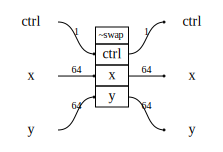

In [3]:
from qualtran.bloqs.swap_network import CSwapApprox

bloq = CSwapApprox(bitsize=64)
show_bloq(bloq)

## `SwapWithZero`
Swaps |Psi_0> with |Psi_x> if selection register stores index `x`.

Implements the unitary U |x> |Psi_0> |Psi_1> ... |Psi_{n-1}> --> |x> |Psi_x> |Rest of Psi>.
Note that the state of `|Rest of Psi>` is allowed to be anything and should not be depended
upon.

#### References
[Trading T-gates for dirty qubits in state preparation and unitary synthesis]
(https://arxiv.org/abs/1812.00954).
    Low, Kliuchnikov, Schaeffer. 2018.


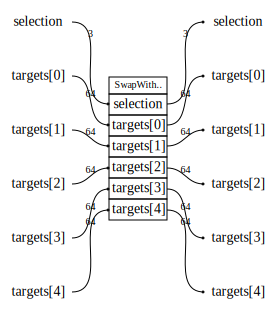

In [4]:
from qualtran.bloqs.swap_network import SwapWithZero

bloq = SwapWithZero(selection_bitsize=3, target_bitsize=64, n_target_registers=5)
show_bloq(bloq)